## IDS Logs Dataset

In [1]:
import pandas as pd
# TODO: use polars to handle dataframe in a more efficient way

data = pd.read_csv('../MC2-CSVFirewallandIDSlogs/IDS_global_filtered.csv')

Extract all the source IPs that performed some suspect activities inside the network.

In [2]:
# read the mapping between the classification number and the classification name
# Store the elements of the first column in a vector
first_col_vector = []
with open('../MC2-CSVFirewallandIDSlogs/classification_mapping.txt', 'r') as file:
    for line in file:
        name, number = line.strip().split(': ')
        first_col_vector.append(name)
print(first_col_vector)

# now select only the col ' sourceIP' that committed ' Potential Corporate Privacy Violation'
sourceIP_potential_corporate_privacy_violation = data[data[' classification'] == 1][' sourceIP']
print("sourceIP_potential_corporate_privacy_violation: ", len(sourceIP_potential_corporate_privacy_violation))
# get the unique entries and print the length
sourceIP_potential_corporate_privacy_violation_unique = sourceIP_potential_corporate_privacy_violation.unique()
print("sourceIP_potential_corporate_privacy_violation_unique: ", len(sourceIP_potential_corporate_privacy_violation_unique))

# now select only the col ' sourceIP' from the rows where the value of the ' classification' column is ' Attempted Information Leak'
sourceIP_attempted_information_leak = data[data[' classification'] == 3][' sourceIP']
print("sourceIP_attempted_information_leak: ", len(sourceIP_attempted_information_leak))
# get the unique entries and print the length
sourceIP_attempted_information_leak_unique = sourceIP_attempted_information_leak.unique()
print("sourceIP_attempted_information_leak_unique: ", sourceIP_attempted_information_leak_unique)
# verify if all the ips start with 173 or 172 ..

# get the piority of the packets that are classified as ' Potential Corporate Privacy Violation'
sourceIP_bad_traffic = data[data[' classification'] == 4][' sourceIP']
print("sourceIP_bad_traffic: ", sourceIP_bad_traffic.unique())
# NOTE: the intersection between the two sets is EMTPY
# intersection = set(sourceIP_potential_corporate_privacy_violation_unique).intersection(set(sourceIP_attempted_information_leak_unique))
# print("intersection: ", len(intersection))

# get packet info of the packets that are classified as ' Potential Corporate Privacy Violation'
packet_info_potential_corporate_privacy_violation = data[data[' classification'] == 1][' packet info']
print("packet_info_potential_corporate_privacy_violation: ", packet_info_potential_corporate_privacy_violation.unique())
# same for those classified as ' Attempted Information Leak'
packet_info_attempted_information_leak = data[data[' classification'] == 3][' packet info']
print("packet_info_attempted_information_leak: ", packet_info_attempted_information_leak.unique())
# same for those classified as ' Bad Traffic'
packet_info_bad_traffic = data[data[' classification'] == 4][' packet info']
print("packet_info_bad_traffic: ", packet_info_bad_traffic.unique())

# aggregate all the sourceIPs that are responsible for the aforementioned suspect activities
suspectIPs = pd.concat([sourceIP_potential_corporate_privacy_violation, sourceIP_attempted_information_leak, sourceIP_bad_traffic])
# keep only the unique entries
suspectIPs = suspectIPs.unique()
print("suspectIPs: ", len(suspectIPs))
## ALL THE IPs RESPONSIBLE FOR BAD AND MISCHIEVOUS ACTIVITY ARE INSIDE THE NETWORK

['Generic Protocol Command Decode', 'Potential Corporate Privacy Violation', 'Misc activity', 'Attempted Information Leak', 'Potentially Bad Traffic']
sourceIP_potential_corporate_privacy_violation:  434
sourceIP_potential_corporate_privacy_violation_unique:  89
sourceIP_attempted_information_leak:  366
sourceIP_attempted_information_leak_unique:  ['172.23.240.156' '172.23.236.8' '172.23.231.69' '172.23.234.58'
 '172.23.232.4']
sourceIP_bad_traffic:  ['172.23.240.156' '172.23.236.8' '172.23.231.69' '172.23.234.58'
 '172.23.232.4']
packet_info_potential_corporate_privacy_violation:  [181]
packet_info_attempted_information_leak:  [181]
packet_info_bad_traffic:  [181]
suspectIPs:  94


Plot a histogram of all the source IPs that are responsible for some sort of suspect activity. They are all internal to the network of the company and specifically workstations of individual workers, so these are likely infected machines that can be remotely activated and controlled by malicious parties to perform illegal activities, such as DDoS attacks, port scanning, data exfiltration, etc. The infection probably happened due to bad practices on the part of the workers, such as opening malicious email attachments, visiting dangerous websites, using infected drivers, or using weak passwords.

/tmp/ipykernel_596381/747086520.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sourceIP', y='count', data=activity_counts, palette='viridis')


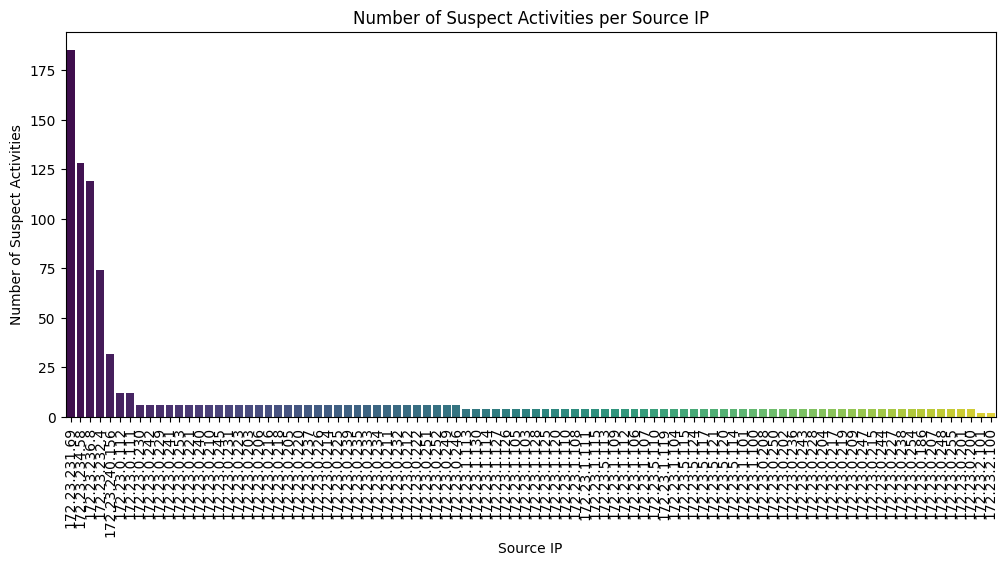

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Filter data for classifications 1, 3, and 4
suspect_activities = data[data[' classification'].isin([1, 3, 4])]

# Count the number of activities per source IP
activity_counts = suspect_activities[' sourceIP'].value_counts().reset_index()
activity_counts.columns = ['sourceIP', 'count']
# # print bin values
# print("Bin values: ", activity_counts)
# # write them to a file
# activity_counts.to_csv('activity_counts.csv', index=False)

# Plot the histogram using seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x='sourceIP', y='count', data=activity_counts, palette='viridis')
plt.xlabel('Source IP')
plt.ylabel('Number of Suspect Activities')
plt.title('Number of Suspect Activities per Source IP')
plt.xticks(rotation=90)
plt.show()

We can observe that all suspect IPs are located inside the network, moreover the distribution is quite peculiar, since the vast majority of the IPs have committed exactly 4 or 6 suspect activities, which looks like an artifact injected from outside.

/tmp/ipykernel_596381/1934900693.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  five_min_counts = suspect_activities.resample('3T').size()
/tmp/ipykernel_596381/1934900693.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_data.index, y=day_data.values, palette=colors)
/tmp/ipykernel_596381/1934900693.py:37: UserWarning: The palette list has more values (972) than needed (118), which may not be intended.
  sns.barplot(x=day_data.index, y=day_data.values, palette=colors)


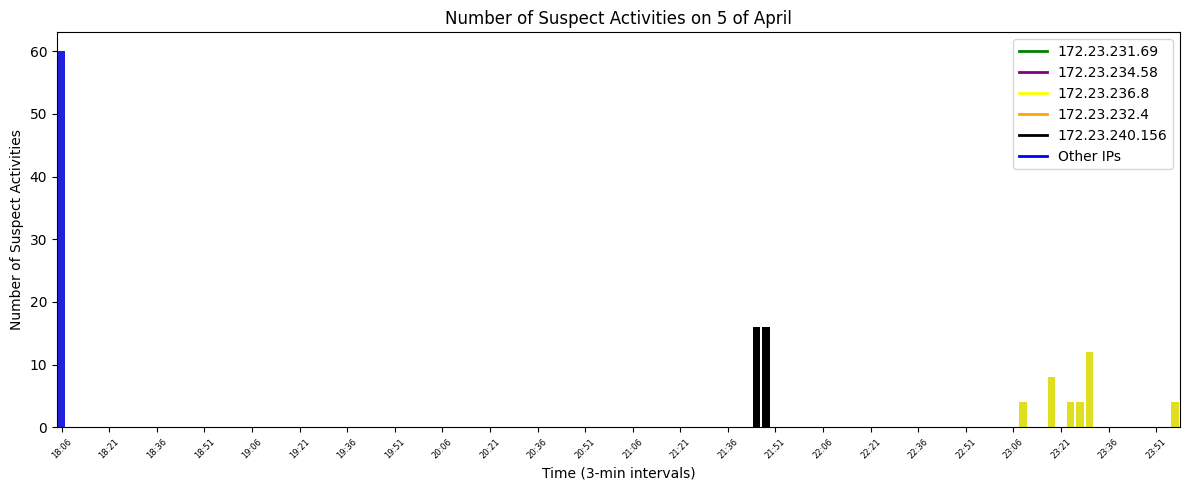

/tmp/ipykernel_596381/1934900693.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_data.index, y=day_data.values, palette=colors)
/tmp/ipykernel_596381/1934900693.py:37: UserWarning: The palette list has more values (972) than needed (366), which may not be intended.
  sns.barplot(x=day_data.index, y=day_data.values, palette=colors)


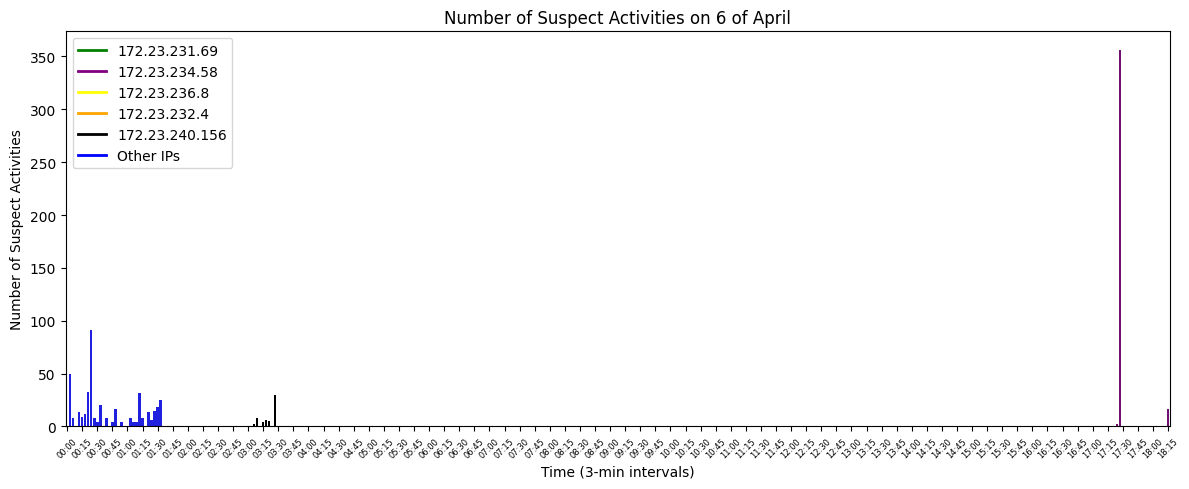

In [4]:
# Convert 'time' to datetime. Adjust the format string if your actual data differs.
data['time'] = pd.to_datetime(data['time'], format='%d %H:%M')

# Filter the data for classifications 1, 3, and 4
suspect_activities = data[data[' classification'].isin([1, 3, 4])]

# Set the 'time' column as the index so we can resample easily
suspect_activities = suspect_activities.set_index('time')

# Resample every 3 minutes and count activities
five_min_counts = suspect_activities.resample('3T').size()

# Get the unique days present in the data
unique_days = five_min_counts.index.normalize().unique()

# Get the top 5 source IPs that carried out the most attacks
top_5_ips = activity_counts.iloc[:5]['sourceIP']

for day in unique_days:
    # Filter data for this particular day
    day_start = day
    day_end = day + pd.Timedelta(days=1)
    day_data = five_min_counts[(five_min_counts.index >= day_start) & (five_min_counts.index < day_end)]
    
    # Create a figure for this day
    plt.figure(figsize=(12,5))
    
    # Assign colors based on whether the source IP is in the top 5
    colors = ['green' if ip == top_5_ips.values[0] else
              'purple' if ip == top_5_ips.values[1] else
              'yellow' if ip == top_5_ips.values[2] else
              'orange' if ip == top_5_ips.values[3] else
              'black' if ip == top_5_ips.values[4] else
              'blue' for ip in suspect_activities[' sourceIP']]

    
    sns.barplot(x=day_data.index, y=day_data.values, palette=colors)
    plt.xlabel('Time (3-min intervals)')
    plt.ylabel('Number of Suspect Activities')
    plt.title(f'Number of Suspect Activities on {day.date().day} of April')

    # Define custom ticks for this day's data
    x_labels = day_data.index
    num_points = len(x_labels)
    
    # For example, show a tick every 5 samples
    tick_positions = range(0, num_points, 5)
    tick_labels = [x_labels[i].strftime('%H:%M') for i in tick_positions]  # Just time for this day
    
    plt.xticks(tick_positions, tick_labels, rotation=45, fontsize=6)
    plt.tight_layout()
    # add a legend for the color mapping with the IPs
    plt.legend(handles=[plt.Line2D([0], [0], color='green', lw=2, label=top_5_ips.values[0]),
                       plt.Line2D([0], [0], color='purple', lw=2, label=top_5_ips.values[1]),
                       plt.Line2D([0], [0], color='yellow', lw=2, label=top_5_ips.values[2]),
                       plt.Line2D([0], [0], color='orange', lw=2, label=top_5_ips.values[3]),
                       plt.Line2D([0], [0], color='black', lw=2, label=top_5_ips.values[4]),
                       plt.Line2D([0], [0], color='blue', lw=2, label='Other IPs')])
    plt.show()

In [5]:
# now print all the destination IPs of the suspect activities
destinationIPs = suspect_activities[' destIP']
# count the number of occurrences for each destination IP
destinationIPs = destinationIPs.value_counts().reset_index()
destinationIPs.columns = ['destIP', 'count']
# print bin values
print(destinationIPs)

# also get the destination port of the suspect activities, where the destIP is 172.23.0.10
destinationPort = suspect_activities[suspect_activities[' destIP'] == '172.23.0.10'][' destPort']
# count the number of occurrences for each destination port
destinationPort = destinationPort.value_counts().reset_index()
destinationPort.columns = ['destPort', 'count']
# print bin values
print(destinationPort) 


        destIP  count
0   172.23.0.1    538
1  172.23.0.10    434
   destPort  count
0        53    434


From the above histogram plots of the time distribution of suspect network activities, we can conclude that all the attacks are either intercepted by the Firewall interface to regional bank network or target the DNS server. The latter is a server running critical network operations: domain controller and domain name server. In this case, they probably build a successful connection with a remote server, which may be a sign of a successful data exfiltration attack.
Moreover, we can see the time distribution of the attacks. Probably the infected workstations were activated remotely during the closing hours of the Bank of Money, thus neutralizing any capability of the bank to respond to the attacks in real-time. This is a serious security breach that needs to be addressed as soon as possible. It is highly unlikely that the actors physically introduced themselves inside the building.

We can see that all the suspect activities are directed to the same destination port 53 with UDP protocol and to the DNS server. It should be noted that some trojans and worms use this port to listen to
remote commands on the port 53/tcp. Also, some exploits concerning stack-based buffer overflows 
allows remote attackers to execute arbitrary code by sending a crafted packed to port 53/udp
additionally, softwares which still use open DNS resolvers are vulnerable to DDoS attacks on port 53
source: https://www.speedguide.net/port.php?port=53

From our understanding, we can conclude that the attackers are probably setting up a DDOS attack
due to the ability to easily spoof the source packets sent to DNS servers, source: https://www.cbtnuggets.com/common-ports/what-is-port-53

## Firewall Logs dataset
Load it once, then perform some analysis to identify information of interest.

In [2]:
import pandas as pd
# now load the dataset of the firewall logs
data_firewall = pd.read_csv('../MC2-CSVFirewallandIDSlogs/Firewall_global_filtered.csv')

In [7]:
# select all the rows corresponding to the suspectIPs
suspect_firewall_logs = data_firewall[data_firewall['Source IP'].isin(suspectIPs)]

# select all destination IPs
destinationIPs = suspect_firewall_logs['Destination IP'].unique()
print("destinationIPs: ", len(destinationIPs))

destinationIPs:  11


In [8]:
# now select all the rows where suspect IPs are the destination IPs
suspect_firewall_logs_dest = data_firewall[data_firewall['Destination IP'].isin(suspectIPs)]
# lenght
print("suspect_firewall_logs: ", len(suspect_firewall_logs_dest))

suspect_firewall_logs:  0


The suspect IPs never appear as destination of the traffic, so they are not receiving any data from the network.

In [9]:
# read the mapping between the operation number and the operation name
# read it from the txt file at location '../MC2-CSVFirewallandIDSlogs/operation_mapping.txt'
operation_mapping = {}
with open('../MC2-CSVFirewallandIDSlogs/operation_mapping.txt', 'r') as file:
    for line in file:
        number, name = line.strip().split(': ')
        operation_mapping[str(number)] = name

print(operation_mapping)

{'Teardown': '0', 'Built': '1', '(empty)': '2', 'Command executed': '3', 'Deny': '4', 'Deny by ACL': '5'}


/tmp/ipykernel_596381/284255667.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Operation', y='count', data=operation_counts, ax=axes[0, 0], palette='viridis')
/tmp/ipykernel_596381/284255667.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Message code', y='count', data=message_code_counts, ax=axes[0, 1], palette='plasma')
/tmp/ipykernel_596381/284255667.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Destination service', y='count', data=dest_service_counts, ax=axes[1, 0], palette='cividis')
/tmp/ipykernel_596381/284

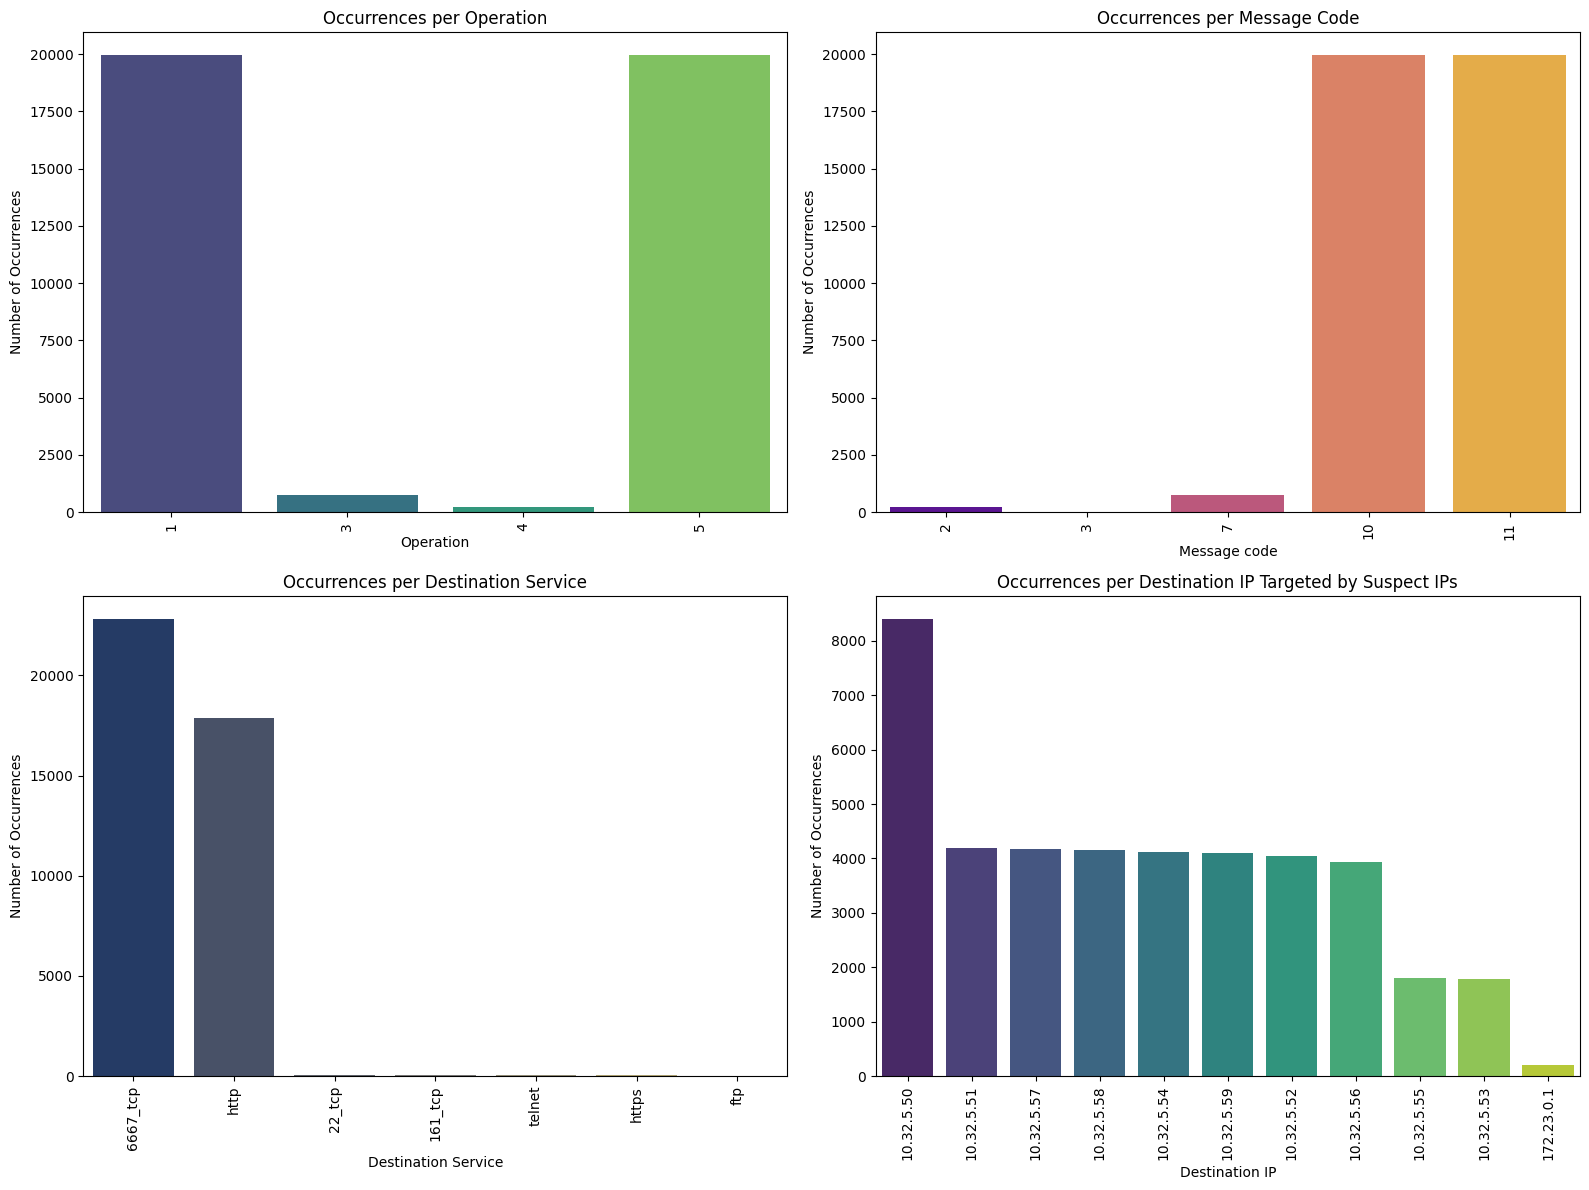

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for suspect IPs
suspect_activities_firewall = data_firewall[data_firewall['Source IP'].isin(suspectIPs)]

# Count occurrences per attribute
operation_counts = suspect_activities_firewall['Operation'].value_counts().reset_index()
operation_counts.columns = ['Operation', 'count']

message_code_counts = suspect_activities_firewall['Message code'].value_counts().reset_index()
message_code_counts.columns = ['Message code', 'count']

dest_service_counts = suspect_activities_firewall['Destination service'].value_counts().reset_index()
dest_service_counts.columns = ['Destination service', 'count']

# Count the number of occurrences per destination IP
destination_ip_counts = suspect_firewall_logs['Destination IP'].value_counts().reset_index()
destination_ip_counts.columns = ['Destination IP', 'count']

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot occurrences per Operation
sns.barplot(x='Operation', y='count', data=operation_counts, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_xlabel('Operation')
axes[0, 0].set_ylabel('Number of Occurrences')
axes[0, 0].set_title('Occurrences per Operation')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot occurrences per Message code
sns.barplot(x='Message code', y='count', data=message_code_counts, ax=axes[0, 1], palette='plasma')
axes[0, 1].set_xlabel('Message code')
axes[0, 1].set_ylabel('Number of Occurrences')
axes[0, 1].set_title('Occurrences per Message Code')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot occurrences per Destination service
sns.barplot(x='Destination service', y='count', data=dest_service_counts, ax=axes[1, 0], palette='cividis')
axes[1, 0].set_xlabel('Destination Service')
axes[1, 0].set_ylabel('Number of Occurrences')
axes[1, 0].set_title('Occurrences per Destination Service')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot occurrences per Destination IP
sns.barplot(x='Destination IP', y='count', data=destination_ip_counts, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_xlabel('Destination IP')
axes[1, 1].set_ylabel('Number of Occurrences')
axes[1, 1].set_title('Occurrences per Destination IP Targeted by Suspect IPs')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

We can notice that the vast majority of the network connections of suspect IPs is related to accessing external websites. Only a small portion of these accesses are intercepted by the Firewall interface to regional bank network, which has IP 172.23.0.1, and likely all correspond to the illegal activities that we investigated before.
Moreover, we notice that suspect IPs never contact each other, so it is unlikely that eventual moles are collaborating. Actually, these addresses never appear as destination IPs, so they only have an active role in the network, as one can see below. 
Moreover, half of these connections has been denied by ACL (Access Control List) rules, which are the first line of defense of the network. It specifies which users have access to which resources, as well as which operations they are allows to perform on a given resource. This means that most of the activities are blocked before they can take affect, so they have not damaged the company. Approximately the other half of the suspect activities have successfully built a connection with an external internet website, and a very small portion have executed a command that had been sent through the network. 

/tmp/ipykernel_596381/3519702354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_firewall_logs['datetime'] = pd.to_datetime(suspect_firewall_logs['Date/time'], format='%d %H:%M:%S')


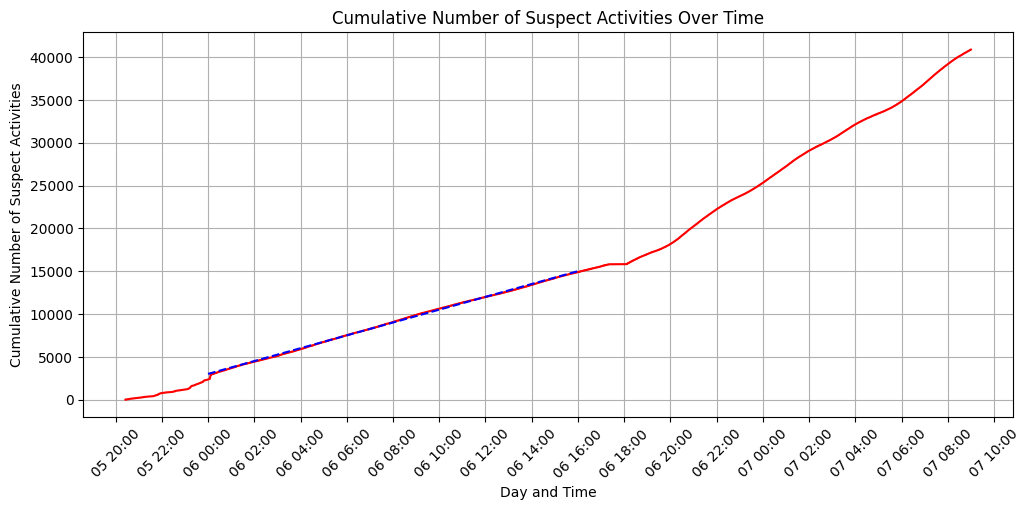

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the 'time' column to datetime format
suspect_firewall_logs['datetime'] = pd.to_datetime(suspect_firewall_logs['Date/time'], format='%d %H:%M:%S')

suspect_activities_firewall = suspect_firewall_logs
# Sort the data by datetime
suspect_activities_firewall = suspect_activities_firewall.sort_values(by='datetime')

# Sample the data to reduce the size of the dataset
# suspect_activities = suspect_activities.iloc[::4, :]

# Create a cumulative count of suspect activities
suspect_activities_firewall['cumulative_count'] = range(1, len(suspect_activities_firewall) + 1)

# Plot the line plot with a red line
plt.figure(figsize=(12, 5))
sns.lineplot(x='datetime', y='cumulative_count', data=suspect_activities_firewall, color='red')

# Plot the additional line from (06 00:00, 3000) to (06 16:00, 15000)
plt.plot([pd.Timestamp('1900-01-06 00:00:00'), pd.Timestamp('1900-01-06 16:00:00')], [3000, 15000], color='blue', linestyle='--')

# Adjust the x-axis format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))  # Format: Day Hour:Minute
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Show labels every 2 hours

plt.xlabel('Day and Time')
plt.ylabel('Cumulative Number of Suspect Activities')
plt.title('Cumulative Number of Suspect Activities Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The line plot above shows the trend of network activity of the suspect IPs, including both suspect and legal ones. Of course, the vast majority of the activities are legal. The trend presents a strange behaviour, since a large portion of their activity happens overnight, when the company should be closed. Since we have already concluded that potential suspects acted from within the company, specifically using the workstations of individual workers, it is unclear how they can have physical access to the company building during the night and perform such large scale activities without being noticed. Moreover, the amount of network logs relatied to them increases at an almost perfectly constant rate between 00:00 and 17:00 of the 06/04, which may indicate that the data we were given is somehow corrupted. To make this clearer, we superimposed a straight line between two points in the line plot and it matches the trend in the activities by suspect IPs. 

In [12]:
# # Get the top 5 source IPs that carried out the most attacks
# top_5_ips = activity_counts.iloc[:5]['sourceIP']

# # Filter the data for the top 5 source IPs
# top_5_attacks_data = suspect_activities_firewall[suspect_activities_firewall['Source IP'].isin(top_5_ips)]

# # Create a cumulative count of suspect activities for each source IP
# top_5_attacks_data = top_5_attacks_data.sort_values(by='datetime')
# top_5_attacks_data['cumulative_count'] = top_5_attacks_data.groupby('Source IP').cumcount() + 1

# # Plot the line plot for each of the top 5 source IPs
# plt.figure(figsize=(12, 5))
# for ip in top_5_ips:
#     ip_data = top_5_attacks_data[top_5_attacks_data['Source IP'] == ip]
#     sns.lineplot(x='datetime', y='cumulative_count', data=ip_data, label=ip)

# # Adjust the x-axis format
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))  # Format: Day Hour:Minute
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Show labels every 2 hours

# plt.xlabel('Day and Time')
# plt.ylabel('Cumulative Number of Suspect Activities')
# plt.title('Cumulative Number of Suspect Activities Over Time for Top 5 Source IPs')
# plt.xticks(rotation=45)
# plt.legend(title='Source IP')
# plt.grid(True)
# plt.show()


This line plot has a very similar trend to the previous one and shows the network activity growth by the five most active suspect IPs. They all grow at exactly the same rate, except for an initial transient state. This is another indication that the data we were given may be artificial. The only difference is the 5th most active suspect IP, which has a number of connections signficantly lower than the other four, of 2 orders of magnitude. This may indicate that the data relating to this IP has not been manipulated. Let us check the number of connections of these IPs in the firewall dataset.

In [13]:
# get the number of network connections of the 5 most active IPs, per single IP
number_of_network_connections = suspect_firewall_logs['Source IP'].value_counts().reset_index()
number_of_network_connections.columns = ['Source IP', 'count']
print(number_of_network_connections)

        Source IP  count
0   172.23.234.58  10249
1    172.23.232.4  10220
2  172.23.240.156  10188
3   172.23.231.69  10185
4    172.23.236.8     40


## GENERIC TRENDS IN THE DATA
Let us analyze more generic trends, without focusing on the suspect IPs.

In [14]:
# select all the rows of data_firewall where the destinationIP is the firewall
# i.e. 10.32.0.1, 172.23.0.1, 10.32.0.100, , 172.25.0.1
firewall_destination = data_firewall[data_firewall['Destination IP'].isin(['10.32.0.1', '172.23.0.1', '172.25.0.1', '10.32.0.100'])]
print("firewall_destination: ", len(firewall_destination))
# NOTE: this amount to roughly 1/3 of the total number of rows in the firewall logs
# now select the sourceIPs corresponding to the connections to the firewall
firewall_sourceIPs = firewall_destination['Source IP'].unique()
print("firewall_sourceIPs: ", len(firewall_sourceIPs))

firewall_source = data_firewall[data_firewall['Source IP'].isin(['10.32.0.1', '172.23.0.1', '172.25.0.1', '10.32.0.100'])]
print("firewall_source: ", len(firewall_source))

# extract the classifica

firewall_destination:  8775281
firewall_sourceIPs:  2727
firewall_source:  1895


In [15]:
# select the 10 most active source IPs from data_firewall, which need to be all different
top_10_sourceIPs = data_firewall['Source IP'].value_counts().reset_index()
top_10_sourceIPs.columns = ['Source IP', 'count']
top_10_sourceIPs = top_10_sourceIPs.iloc[:10]
print(top_10_sourceIPs)


        Source IP   count
0   172.23.252.10  121752
1    172.23.0.132  118398
2   172.23.233.58   14598
3   172.23.233.50   14529
4  172.23.232.253   14509
5  172.23.232.252   14503
6   172.23.233.53   14471
7  172.23.232.255   14448
8  172.23.232.132   14435
9   172.23.233.57   14435


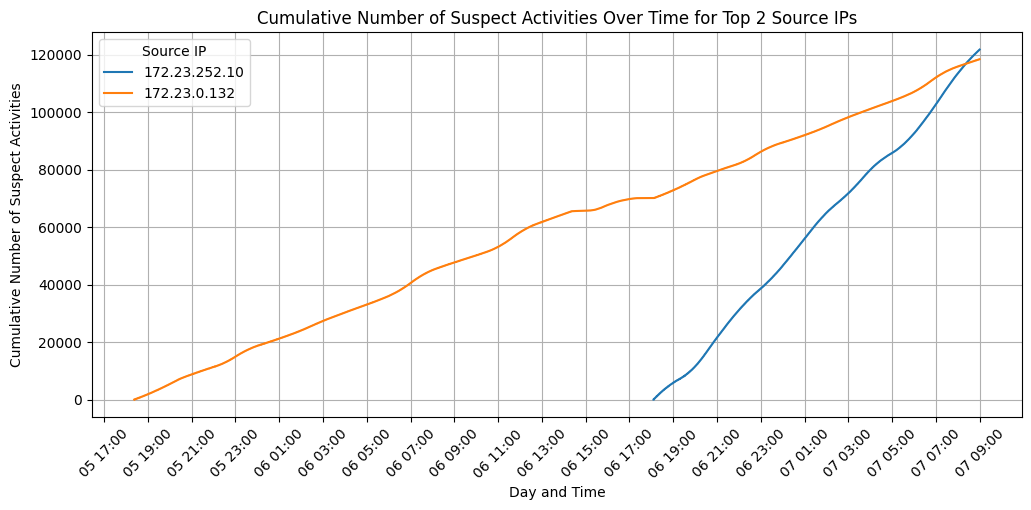

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the 'time' column to datetime format
data_firewall['datetime'] = pd.to_datetime(data_firewall['Date/time'], format='%d %H:%M:%S')

# Sort the data by datetime
data_firewall = data_firewall.sort_values(by='datetime')

# select only the rows corresponding to the top 2 source IPs
top_2_IPs = top_10_sourceIPs['Source IP'].iloc[:2]
top_2_data = data_firewall[data_firewall['Source IP'].isin(top_2_IPs)]

# Create a cumulative count of suspect activities for each source IP
top_2_data = top_2_data.sort_values(by='datetime')
top_2_data['cumulative_count'] = top_2_data.groupby('Source IP').cumcount() + 1

# Plot the line plot for each of the top 2 source IPs
plt.figure(figsize=(12, 5))
for ip in top_2_IPs:
    ip_data = top_2_data[top_2_data['Source IP'] == ip]
    sns.lineplot(x='datetime', y='cumulative_count', data=ip_data, label=ip)

# Adjust the x-axis format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))  # Format: Day Hour:Minute
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Show labels every 2 hours

plt.xlabel('Day and Time')
plt.ylabel('Cumulative Number of Suspect Activities')
plt.title('Cumulative Number of Suspect Activities Over Time for Top 2 Source IPs')
plt.xticks(rotation=45)
plt.legend(title='Source IP')
plt.grid(True)
plt.show()

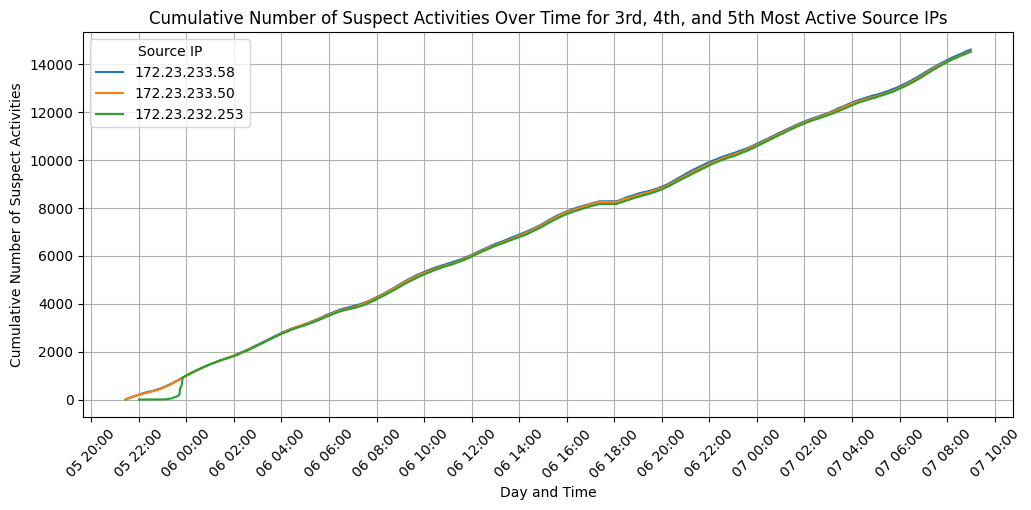

In [22]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the 'time' column to datetime format
data_firewall['datetime'] = pd.to_datetime(data_firewall['Date/time'], format='%d %H:%M:%S')

# Sort the data by datetime
data_firewall = data_firewall.sort_values(by='datetime')

# select only the rows corresponding to the 3rd, 4th, and 5th most active source IPs
top_3_5_IPs = top_10_sourceIPs['Source IP'].iloc[2:5]
top_3_5_data = data_firewall[data_firewall['Source IP'].isin(top_3_5_IPs)]

# Create a cumulative count of suspect activities for each source IP
top_3_5_data = top_3_5_data.sort_values(by='datetime')
top_3_5_data['cumulative_count'] = top_3_5_data.groupby('Source IP').cumcount() + 1

# Plot the line plot for each of the 3rd, 4th, and 5th most active source IPs
plt.figure(figsize=(12, 5))
for ip in top_3_5_IPs:
    ip_data = top_3_5_data[top_3_5_data['Source IP'] == ip]
    sns.lineplot(x='datetime', y='cumulative_count', data=ip_data, label=ip)

# Adjust the x-axis format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))  # Format: Day Hour:Minute
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Show labels every 2 hours

plt.xlabel('Day and Time')
plt.ylabel('Cumulative Number of Suspect Activities')
plt.title('Cumulative Number of Suspect Activities Over Time for 3rd, 4th, and 5th Most Active Source IPs')
plt.xticks(rotation=45)
plt.legend(title='Source IP')
plt.grid(True)
plt.show()

In [14]:
# select all unique destination services in data_firewall
destination_services = data_firewall['Destination service'].unique()
print("destination_services: ", len(destination_services))
# select the 10 most active destination services
top_10_destination_services = data_firewall['Destination service'].value_counts().reset_index()
top_10_destination_services.columns = ['Destination service', 'count']
top_10_destination_services = top_10_destination_services.iloc[:10]
print(top_10_destination_services)

destination_services:  28008
  Destination service     count
0                http  21331506
1            6667_tcp   2329914
2                 ftp      1825
3              domain       752
4              22_tcp       538
5            1026_udp       194
6          netbios-ns       130
7                auth        62
8            1025_udp        50
9               https        42


/tmp/ipykernel_965368/3284224309.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firewall_data['datetime'] = pd.to_datetime(firewall_data['Date/time'], format='%d %H:%M:%S')
/tmp/ipykernel_965368/3284224309.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  activity_counts = firewall_data.resample('8T').size()


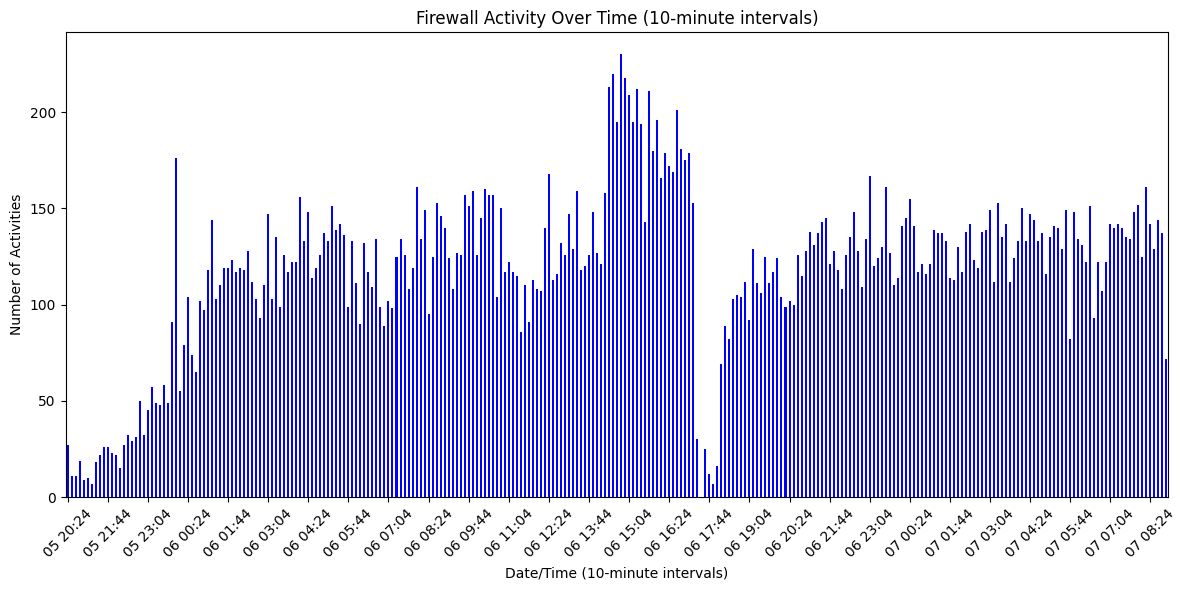

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the firewall IPs
firewall_data = data_firewall[data_firewall['Destination IP'].isin(['172.23.0.1', '10.32.0.1'])]

# Convert the 'Date/time' column to datetime format
firewall_data['datetime'] = pd.to_datetime(firewall_data['Date/time'], format='%d %H:%M:%S')

# Set the 'datetime' column as the index
firewall_data.set_index('datetime', inplace=True)

# Resample the data in 10-minute intervals and count the number of activities
activity_counts = firewall_data.resample('8T').size()

# Plot the histogram
plt.figure(figsize=(12, 6))
activity_counts.plot(kind='bar', color='blue')
plt.xlabel('Date/Time (10-minute intervals)')
plt.ylabel('Number of Activities')
plt.title('Firewall Activity Over Time (10-minute intervals)')
plt.xticks(ticks=range(0, len(activity_counts), 10), labels=[d.strftime('%d %H:%M') for d in activity_counts.index[::10]], rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_961452/3901513741.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_firewall_data['datetime'] = pd.to_datetime(filtered_firewall_data['Date/time'], format='%d %H:%M:%S')
/tmp/ipykernel_961452/3901513741.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  service_counts = filtered_firewall_data.groupby('Destination service').resample('10T').size().unstack(level=0, fill_value=0)


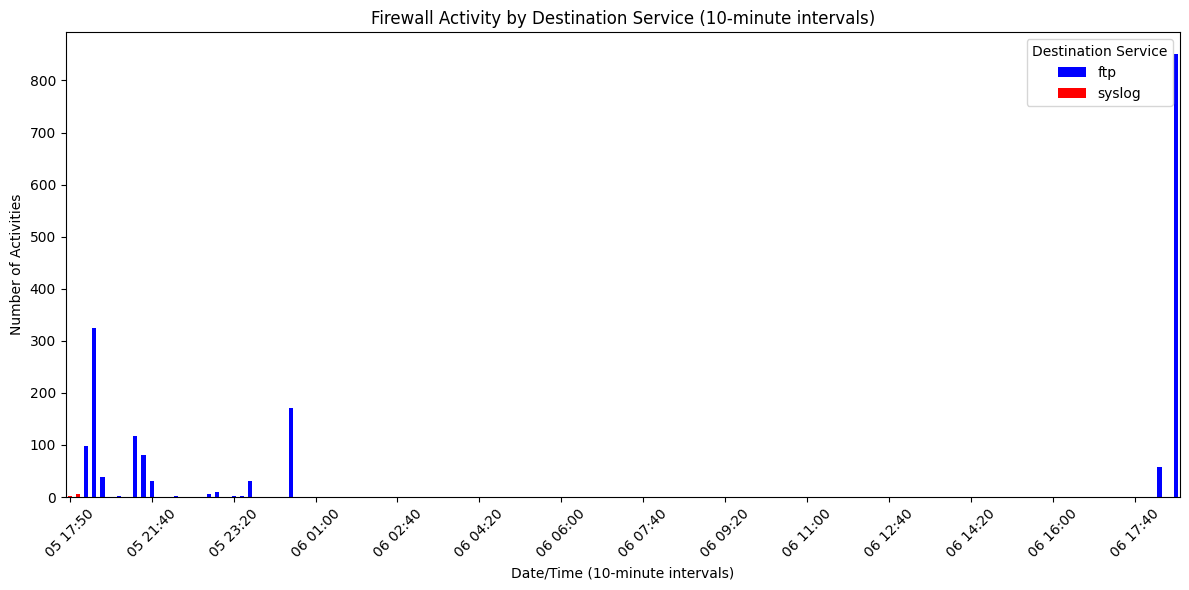

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dataset structure
# Assuming `data_firewall` is a DataFrame with 'Destination IP', 'Date/time', and 'Destination service' columns.

# Filter the data for the firewall IPs and the desired services
filtered_firewall_data = data_firewall[ 
    (data_firewall['Destination service'].isin(['ftp', 'ssh', 'syslog']))
]

# Convert the 'Date/time' column to datetime format
filtered_firewall_data['datetime'] = pd.to_datetime(filtered_firewall_data['Date/time'], format='%d %H:%M:%S')

# Set the 'datetime' column as the index
filtered_firewall_data.set_index('datetime', inplace=True)

# Resample the data in 10-minute intervals and count occurrences for each service
service_counts = filtered_firewall_data.groupby('Destination service').resample('10T').size().unstack(level=0, fill_value=0)

# Plot the histogram
plt.figure(figsize=(12, 6))
service_counts.plot(kind='bar', stacked=True, color={'ftp': 'blue', 'http': 'orange', 'ssh': 'green', 'syslog': 'red'}, ax=plt.gca())
plt.xlabel('Date/Time (10-minute intervals)')
plt.ylabel('Number of Activities')
plt.title('Firewall Activity by Destination Service (10-minute intervals)')
plt.xticks(ticks=range(0, len(service_counts), 10), labels=[d.strftime('%d %H:%M') for d in service_counts.index[::10]], rotation=45)
plt.legend(title="Destination Service")
plt.tight_layout()
plt.show()

First of all, it is important to note that the firewall is down for a short period of time, between 17:30 and 17:40 on the 5th. Moreover, we can note that there is a peak in the ftp network packets right after the firewall comes back up, which is an indication of a possible attack. 

ssh_data:  0
